<a href="https://colab.research.google.com/github/llcorrea/TensorFlow_module/blob/main/TensorFlow_module.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**ML model with TensorFlow2**

# **Import libs**

In [61]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_squared_error

In [62]:
#@title Using TensorFlow 2.x
%tensorflow_version 2.x
import tensorflow as tf

TensorFlow (TF) is an end-to-end open source platform for machine learning.

Its APIs are organized hierarchically, with the high-level APIs built on the low-level APIs. 

Low-level APIs are used to explore new machine learning algorithms.

On the contrary, the high-level API named **tf.keras** is used to train and define machine learning models.

TF documentation: https://www.tensorflow.org/

# **Functions**

**Baseline model: Dummy Regressor using the mean values of target feature**

Build, train and make predictions via the Dummy Regressor model using as input parameters the dataset entries (features and labels).

In [63]:
def dummy_prediction(train_X, train_y, val_X, val_y):
  ##baseline model
  ##inner prediction function
  def dummy_model():
    dummy = DummyRegressor('mean')
    dummy.fit(train_X, train_y)
    return dummy.predict(val_X)

  return np.sqrt(mean_squared_error(val_y, dummy_model())) #return RMSE

**Build the TF ML model**

Simple Linear Regression using tf.keras.

In [64]:
def build_model(learning_rate, n_features):
  ##the most simple keras models are sequential, which has one or more layers
  lr_model = tf.keras.models.Sequential()

  ##the topography of a simple linear regression is a single node (unit) in a single layer 
  lr_model.add(tf.keras.layers.Dense(units=1, input_shape=(n_features,)))

  ##compile the model topography to minimize the model's mean squared error while training 
  lr_model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=learning_rate),
                loss="mean_squared_error",
                metrics=[tf.keras.metrics.RootMeanSquaredError()])

  return lr_model

**Train the TF ML model with the input data (features and labels)**

In [65]:
def train_model(model, x_df, y_df, features, epochs, batch_size):
  history = model.fit(x=x_df[features],
                      y=y_df,
                      batch_size=batch_size,
                      epochs=epochs, 
                      verbose=0)

  ##trained model's parameters
  trained_weight = model.get_weights()[0]
  trained_bias = model.get_weights()[1]
  epochs = history.epoch
  
  ##history of each epoch
  hist = pd.DataFrame(history.history)

  rmse = hist["root_mean_squared_error"]

  return trained_weight, trained_bias, epochs, rmse

**Plot functions**

In [66]:
def plot_model(trained_weight, trained_bias, train_df, feature, label):
  """Plot the trained model against the training feature and label"""
  
  ##create a scatter plot from some random points
  random_data = train_df.sample(n=200, random_state=42)
  plt.scatter(random_data[feature], random_data[label])

  plt.xlabel(feature)
  plt.ylabel(label)

  x0 = 0
  y0 = trained_bias
  #x1 = feature[-1]
  x1 = 10000
  y1 = trained_bias + (trained_weight * x1)
  plt.plot([x0, x1], [y0, y1], c='r')

  plt.show()

In [67]:
def plot_loss_curve(epochs, rmse):
  """Plot the loss curve, which shows loss vs. epoch"""

  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Root Mean Squared Error")

  plt.plot(epochs, rmse, label="Loss")
  plt.legend()
  plt.ylim([rmse.min()*0.97, rmse.max()])
  plt.show()

#**Dataset and Training**

**The dataset describes the 1990 census data from California.**

**Load the dataset from Google repository**

https://download.mlcc.google.com/mledu-datasets/california_housing_train.csv

> The dataset contains 17000 data entries with 9 features. 8 independent variables $X$ and one label (dependent variable $y$).

> The goal is to predict the target feature ($y$) **median_house_value** for new data based on the train dataset.\
To do so, we are going to train a linear regression model. The model predicts house value based on the other selected features from the dataset.  

* It has not any missing data. 

* All features are numerical (float64).

The following parameters of the linear regression model must be adjusted to let the model converge (min loss) and better fit the data:
* learning rate
* number of epochs
* batch size

Training loss should steadily decrease, steeply at first, and then more slowly. The loss should stay steady at the final epochs (nearly zero slope), which indicates that model has converged.

PS: One epoch covers sufficient iterations to process every entry in the dataset. Then, epoch is different of iteration. At the end of each iteration, the model's parameters are adjusted based on the reached loss value.

To predict the target feature it is necessary to determine which features correlate with the label. 

**However, our first linear regression model with TF is going to use a single feature as independent variable. Then, it will be extended to handle multiple variables.**

In [68]:
df = pd.read_csv(filepath_or_buffer="https://download.mlcc.google.com/mledu-datasets/california_housing_train.csv")
print(df.shape)
display(df.describe())
display(df.info())
display(df.head())

df["median_house_value"] /= 1000.0 #rescale the label (y)

(17000, 9)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,207300.912353
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,115983.764387
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,119400.000000
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,180400.000000
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,265000.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           17000 non-null  float64
 1   latitude            17000 non-null  float64
 2   housing_median_age  17000 non-null  float64
 3   total_rooms         17000 non-null  float64
 4   total_bedrooms      17000 non-null  float64
 5   population          17000 non-null  float64
 6   households          17000 non-null  float64
 7   median_income       17000 non-null  float64
 8   median_house_value  17000 non-null  float64
dtypes: float64(9)
memory usage: 1.2 MB


None

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


**Dataset split: train and validation**

In [69]:
features=['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms',	'population',	'households',	'median_income'] #independent variables
features=['total_rooms', 'total_bedrooms']  

label='median_house_value' #target variable

X = df[features]
y = df[label]

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

splitted_df=X_train.copy()
splitted_df['median_house_value']=y_train.copy()

**Train and Validation step:**

1. Dummy Regressor model

2. TF Linear Regression model



Dummy prediction | RMSE: 117.42078641860235
Feature: total_rooms


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Trained weight of 0.0305
Trained bias of 108.7405
TF regression model | Train RMSE: 129.64791870117188


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


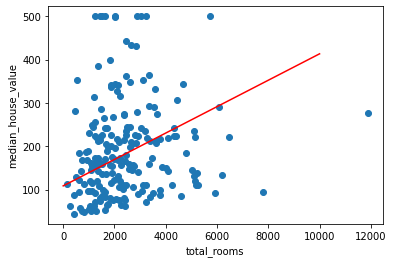

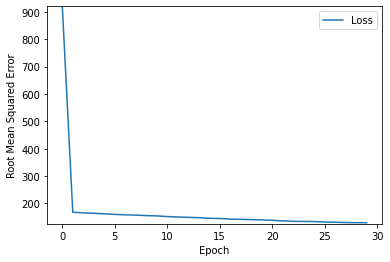

TF regression model | Validation RMSE: 128.3773928102869 129.64791870117188
feature   label          predicted
  value   value          value
          in thousand$   in thousand$
--------------------------------------
 4838    143             256
 2742    500             192
 3705     62             222
 5455    163             275
 1331     91             149
 1616    232             158
  674    148             129
  349    133             119
 1190    438             145
 2873    188             196
  880     68             136
 1937    179             168
 1424    262             152
 2171     58             175
 3437     53             213
  880    119             136
 2086    236             172
  807     40             133
  785     82             133
 2978     66             200
  440    350             122
  894    111             136
 1875    104             166
 3975    500             230
 4308    282             240
 1632    180             158
 1180    173             14

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


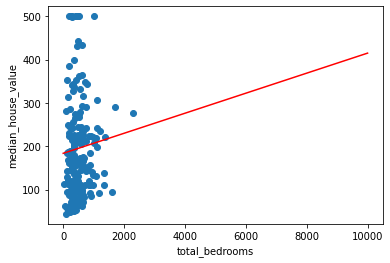

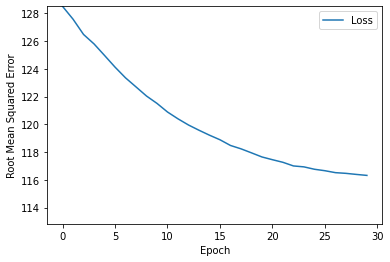

TF regression model | Validation RMSE: 118.01871248887977 116.31726837158203
feature   label          predicted
  value   value          value
          in thousand$   in thousand$
--------------------------------------
  920    143             205
  422    500             194
  739     62             201
  882    163             204
  346     91             192
  292    232             191
  153    148             187
  124    133             187
  182    438             188
  480    188             195
  187     68             188
  286    179             190
  289    262             191
  480     58             195
  696     53             200
  451    119             194
  575    236             197
  199     40             188
  151     82             187
  694     66             200
  202    350             189
  232    111             189
  361    104             192
  716    500             200
  717    282             200
  295    180             191
  212    173             1

In [70]:
##call Dummy model
print('Dummy prediction | RMSE:', dummy_prediction(X_train, y_train, X_val, y_val)) #prediction accuracy of the dummy classifier

##call TF model
learning_rate = 0.01
lr_model=None
lr_model=build_model(learning_rate, n_features=1)

for var_x in features:
  print("Feature:", var_x)
  batch_size = 30
  epochs = 30

  trained_weight, trained_bias, epochs, rmse=train_model(lr_model, X_train, y_train, var_x, epochs, batch_size) #train
  print("Trained weight of %.4f" % trained_weight)
  print("Trained bias of %.4f" % trained_bias)
  print('TF regression model | Train RMSE:', rmse.min())

  plot_model(trained_weight, trained_bias, splitted_df, var_x, label)
  plot_loss_curve(epochs, rmse)

  predicted_val=lr_model.predict_on_batch(x=X_val[var_x]) #prediction
  print('TF regression model | Validation RMSE:', np.sqrt(mean_squared_error(y_val, predicted_val)), rmse.min())

  ##results on batch
  print("feature   label          predicted")
  print("  value   value          value")
  print("          in thousand$   in thousand$")
  print("--------------------------------------")
  X_index=X_val[var_x].index
  y_index=y_val.index
  for i in range(len(X_index)):
    print("%5.0f %6.0f %15.0f" % (X_val[var_x][X_index[i]], y_val[y_index[i]], predicted_val[i][0]))

**Hyperparameter tuning**

In general, ML problems require a lot of hyperparameter tuning. However, there aren't concrete rules for every model. Then, it's necessary to test distinct values in order to find the best set of hyperparameters for model and dataset [[Google AI](https://ai.google/education/)].

The ideal combination of hyperparameters is data dependent, so it's important to always experiment and verify like a cyclical process.